In [1]:
 import cv2
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import pylab
from scipy.spatial.distance import cityblock
from scipy.ndimage import maximum_filter
from scipy.ndimage import minimum_filter

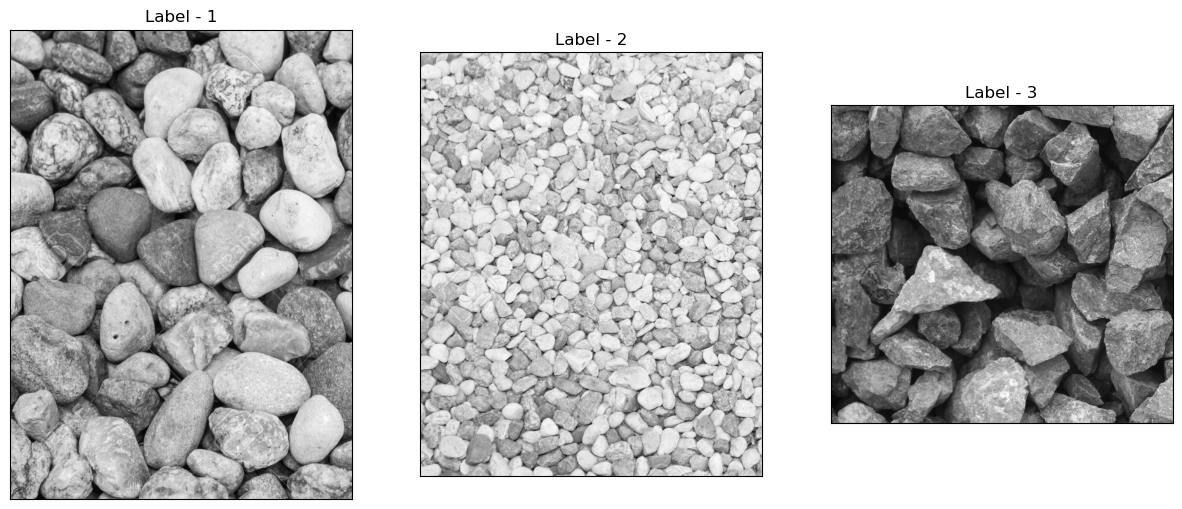

In [2]:
labeled_1=cv2.imread('labeled-1.jpg',cv2.IMREAD_GRAYSCALE)
labeled_2=cv2.imread('labeled-2.jpg',cv2.IMREAD_GRAYSCALE)
labeled_3=cv2.imread('labeled-3.jpg',cv2.IMREAD_GRAYSCALE)

plt.figure(figsize = (15,8))
plt.subplot(131),plt.imshow(labeled_1,cmap = 'gray')
plt.title('Label - 1'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(labeled_2,cmap = 'gray')
plt.title('Label - 2'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(labeled_3,cmap = 'gray')
plt.title('Label - 3'), plt.xticks([]), plt.yticks([])
plt.show()

## Histogram Equalized

In [51]:
def histogram_equalization(image):
    # Compute histogram of the image
    histogram, bins = np.histogram(image.flatten(), 256, [0, 256])

    # Compute cumulative distribution function (CDF)
    cdf = histogram.cumsum()

    # Normalize CDF to scale between 0 and 255
    cdf_normalized = cdf * 255 / cdf[-1]

    # Use linear interpolation to get equalized pixel values
    equalized_image = np.interp(image.flatten(), bins[:-1], cdf_normalized)

    # Reshape the equalized image to the original shape
    equalized_image = equalized_image.reshape(image.shape).astype(np.uint8)

    return equalized_image

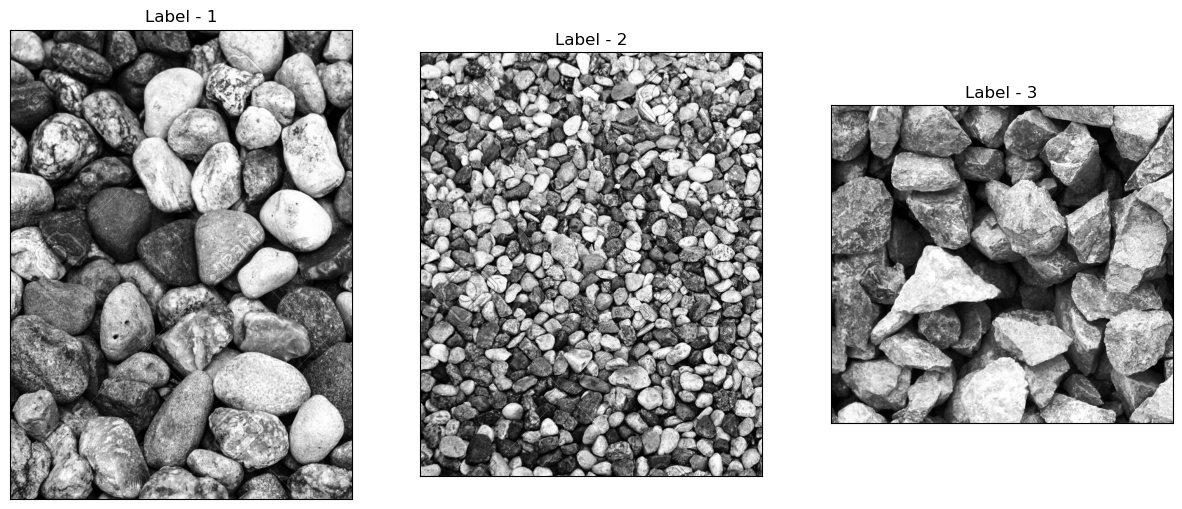

In [52]:
plt.figure(figsize = (15,8))
plt.subplot(131),plt.imshow(histogram_equalization(labeled_1),cmap = 'gray')
plt.title('Label - 1'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(histogram_equalization(labeled_2),cmap = 'gray')
plt.title('Label - 2'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(histogram_equalization(labeled_3),cmap = 'gray')
plt.title('Label - 3'), plt.xticks([]), plt.yticks([])
plt.show()

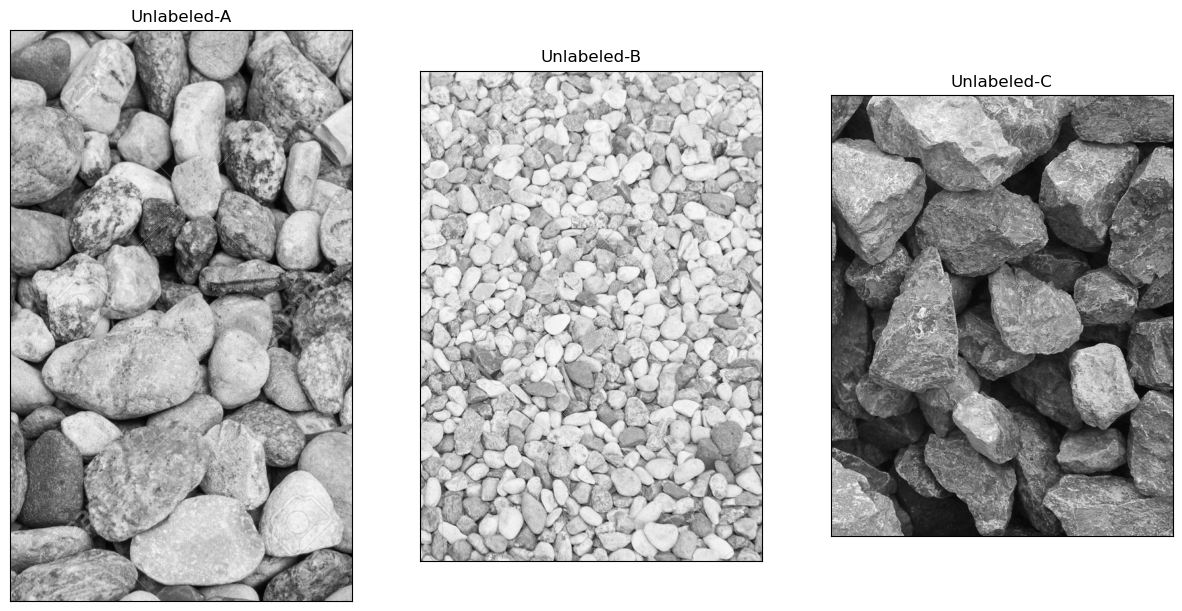

In [22]:
unlabeled_a=cv2.imread('unlabeled-A.jpg',cv2.IMREAD_GRAYSCALE)
unlabeled_b=cv2.imread('unlabeled-B.jpg',cv2.IMREAD_GRAYSCALE)
unlabeled_c=cv2.imread('unlabeled-C.jpg',cv2.IMREAD_GRAYSCALE)

plt.figure(figsize = (15,8))
plt.subplot(131),plt.imshow(unlabeled_a,cmap = 'gray')
plt.title('Unlabeled-A'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(unlabeled_b,cmap = 'gray')
plt.title('Unlabeled-B'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(unlabeled_c,cmap = 'gray')
plt.title('Unlabeled-C'), plt.xticks([]), plt.yticks([])
plt.show()

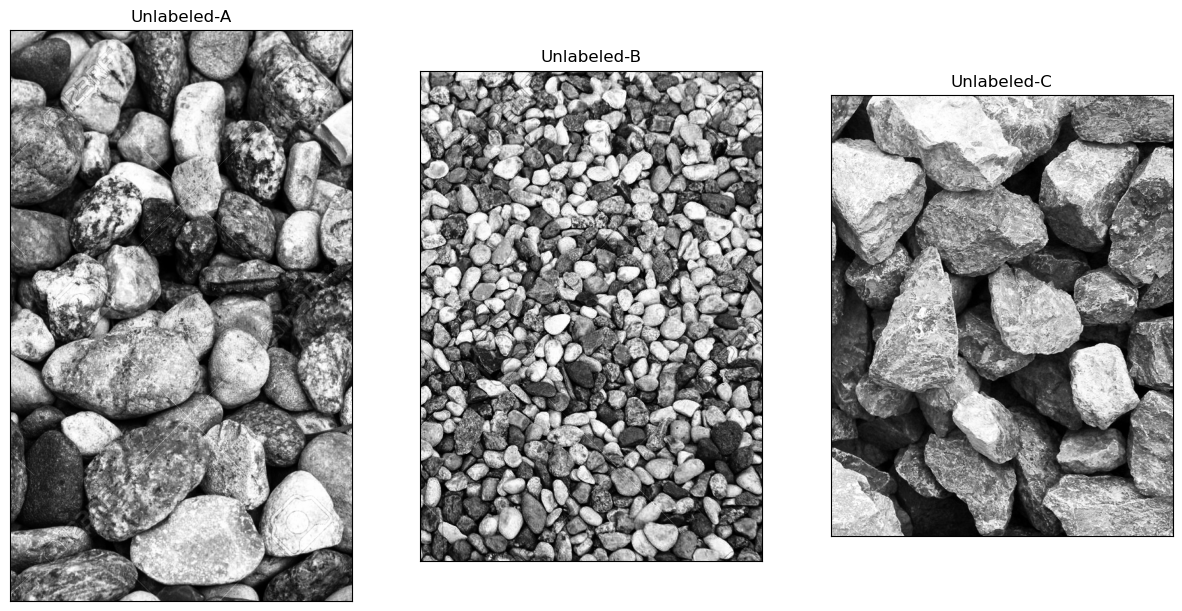

In [53]:
unlabeled_a=cv2.imread('unlabeled-A.jpg',cv2.IMREAD_GRAYSCALE)
unlabeled_b=cv2.imread('unlabeled-B.jpg',cv2.IMREAD_GRAYSCALE)
unlabeled_c=cv2.imread('unlabeled-C.jpg',cv2.IMREAD_GRAYSCALE)

plt.figure(figsize = (15,8))
plt.subplot(131),plt.imshow(histogram_equalization(unlabeled_a),cmap = 'gray')
plt.title('Unlabeled-A'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(histogram_equalization(unlabeled_b),cmap = 'gray')
plt.title('Unlabeled-B'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(histogram_equalization(unlabeled_c),cmap = 'gray')
plt.title('Unlabeled-C'), plt.xticks([]), plt.yticks([])
plt.show()

In [32]:
def grayscale_dilation(image, kernel_size):
    h, w = image.shape
    result_image = image.copy()

    for row in range(h):
        for col in range(w):
            neighborhood = image[max(0, row - kernel_size // 2):min(h, row + kernel_size // 2 + 1),
                                 max(0, col - kernel_size // 2):min(w, col + kernel_size // 2 + 1)]
            
            result_image[row][col] = neighborhood.max()
    return result_image

def grayscale_erosion(image, kernel_size):
    h, w = image.shape
    result_image = image.copy()

    for row in range(h):
        for col in range(w):
            neighborhood = image[max(0, row - kernel_size // 2):min(h, row + kernel_size // 2 + 1),
                                 max(0, col - kernel_size // 2):min(w, col + kernel_size // 2 + 1)]
            
            result_image[row][col] = neighborhood.min()
    return result_image

def opening_by_reconstruction(image, size):
    #To perform opneing by reconstruction, first apply erosion, then apply dilation while comparing it with marker
    eroded_image = grayscale_erosion(image,size)
    marker = np.minimum(image, eroded_image)
    reconstructed_image = image.copy()
    
    #Dilate until you reach the idempotence
    while True:
        dilated_marker = grayscale_dilation(marker, size)
        temp_marker = np.minimum(dilated_marker, image)

        if temp_marker.sum() == marker.sum():
            break

        marker = temp_marker

    return marker

## Label - 1

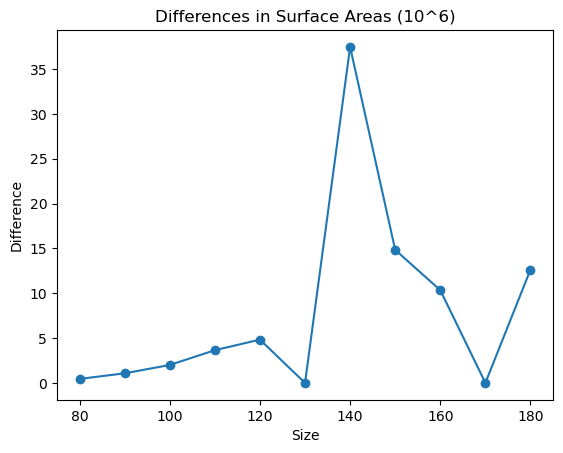

In [38]:
sizes = [70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180]
surface_areas = []
for size in sizes:
    opening_output = opening_by_reconstruction(labeled_1, size)
    surface_areas.append(opening_output.sum()/(10**6))

differences = [abs(second - first) for first, second in zip(surface_areas[:-1], surface_areas[1:])]
plt.plot(sizes[1:], differences, marker='o', linestyle='-')
plt.title('Differences in Surface Areas (10^6)')
plt.xlabel('Size')
plt.ylabel('Difference')
plt.show()

## Label - 2

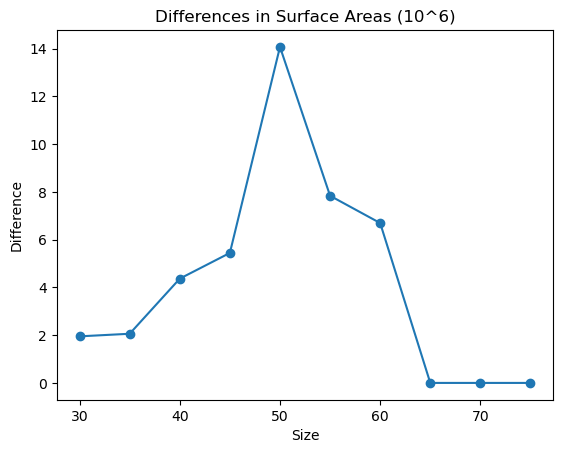

In [39]:
sizes = [25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75]
surface_areas = []
for size in sizes:
    opening_output = opening_by_reconstruction(labeled_2, size)
    surface_areas.append(opening_output.sum()/(10**6))

differences = [abs(second - first) for first, second in zip(surface_areas[:-1], surface_areas[1:])]
plt.plot(sizes[1:], differences, marker='o', linestyle='-')
plt.title('Differences in Surface Areas (10^6)')
plt.xlabel('Size')
plt.ylabel('Difference')
plt.show()

## Label - 3

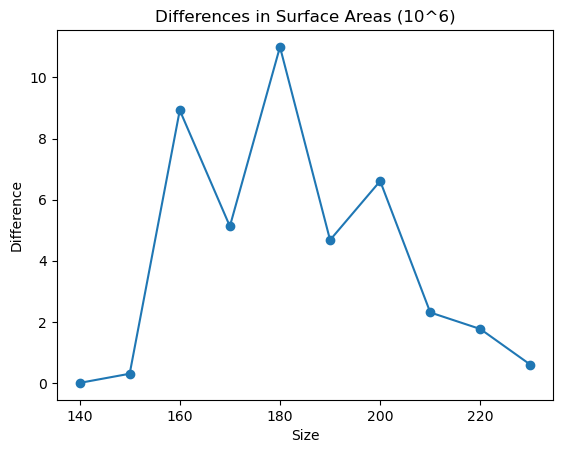

In [40]:
sizes = [130,140, 150, 160, 170, 180, 190, 200, 210, 220, 230]
surface_areas = []
for size in sizes:
    opening_output = opening_by_reconstruction(labeled_3, size)
    surface_areas.append(opening_output.sum()/(10**6))

differences = [abs(second - first) for first, second in zip(surface_areas[:-1], surface_areas[1:])]
plt.plot(sizes[1:], differences, marker='o', linestyle='-')
plt.title('Differences in Surface Areas (10^6)')
plt.xlabel('Size')
plt.ylabel('Difference')
plt.show()

In [60]:
def predict(test):
    def granulometry(image):
        granulometry_series = []
        final_sizes = [45, 140, 200]
        for size in final_sizes:
            # Apply opening by reconstruction
            opR = opening_by_reconstruction(image, size)
            #Find the surface area and append it to the granulometry series
            granulometry_series.append(opR.sum()/(10**6))
        return granulometry_series
    
    #Calculate the granulometry series of labeled images
    labeled_granulometries  = [granulometry(labeled_1) , granulometry(labeled_2), granulometry(labeled_3)]
    
    #Calculate the granulometry serie of unlabeled image
    unlabeled_gran = granulometry(test)
    
    #Calculate the unlabeled image's distance to all labeled images
    distances = [cityblock(unlabeled_gran, labeled_gran) for labeled_gran in labeled_granulometries]
    
    #find the min distance label and return
    predicted_gravel_type = np.argmin(distances) + 1
    return predicted_gravel_type

final_sizes = [45, 140, 200]

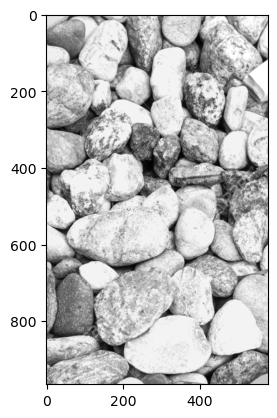

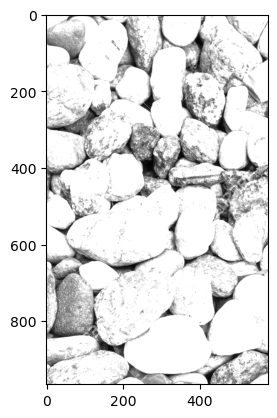

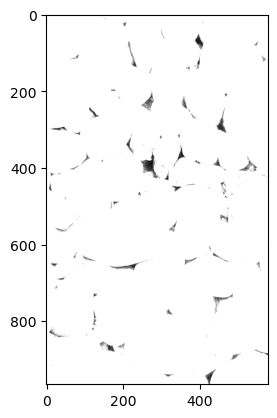

In [64]:
for size in final_sizes:
    opR = opening_by_reconstruction(unlabeled_a, size)
    plt.imshow(opR, cmap="gray")
    plt.show()

In [61]:
predict(unlabeled_a)

1

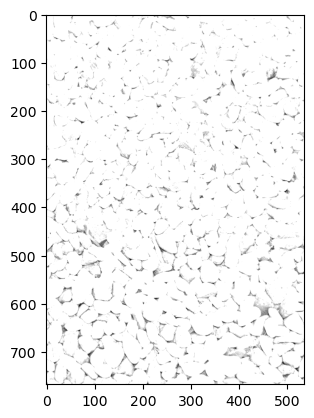

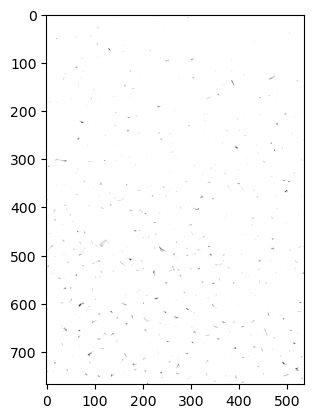

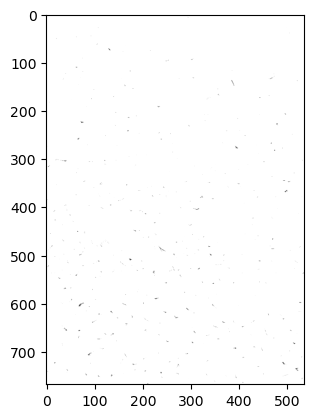

In [65]:
for size in final_sizes:
    opR = opening_by_reconstruction(unlabeled_b, size)
    plt.imshow(opR, cmap="gray")
    plt.show()

In [62]:
predict(unlabeled_b)

2

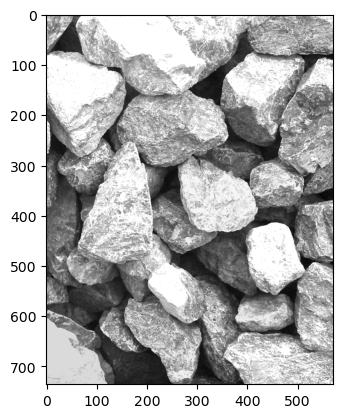

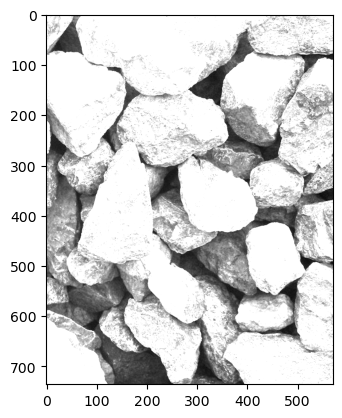

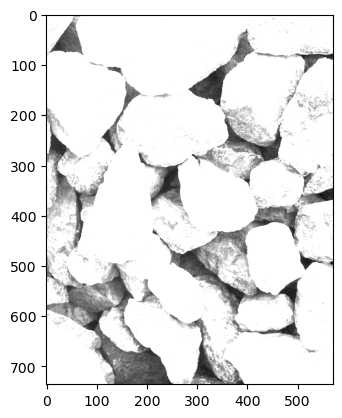

In [66]:
for size in final_sizes:
    opR = opening_by_reconstruction(unlabeled_c, size)
    plt.imshow(opR, cmap="gray")
    plt.show()

In [63]:
predict(unlabeled_c)

3